In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from eeg_net.eeg_net_base import *
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

In [2]:
import numpy as np
X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")
person_train_valid = np.load("data/person_train_valid.npy")
X_train_valid = np.load("data/X_train_valid.npy")
y_train_valid = np.load("data/y_train_valid.npy")
person_test = np.load("data/person_test.npy")

# adjust lable to 0,1,2,3
y_train_valid -= 769
y_test -= 769 
print ('y_train_valid', y_train_valid[:10])


y_train_valid [2 3 0 0 0 0 2 1 3 3]


### Shape of data

In [3]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


## print one data


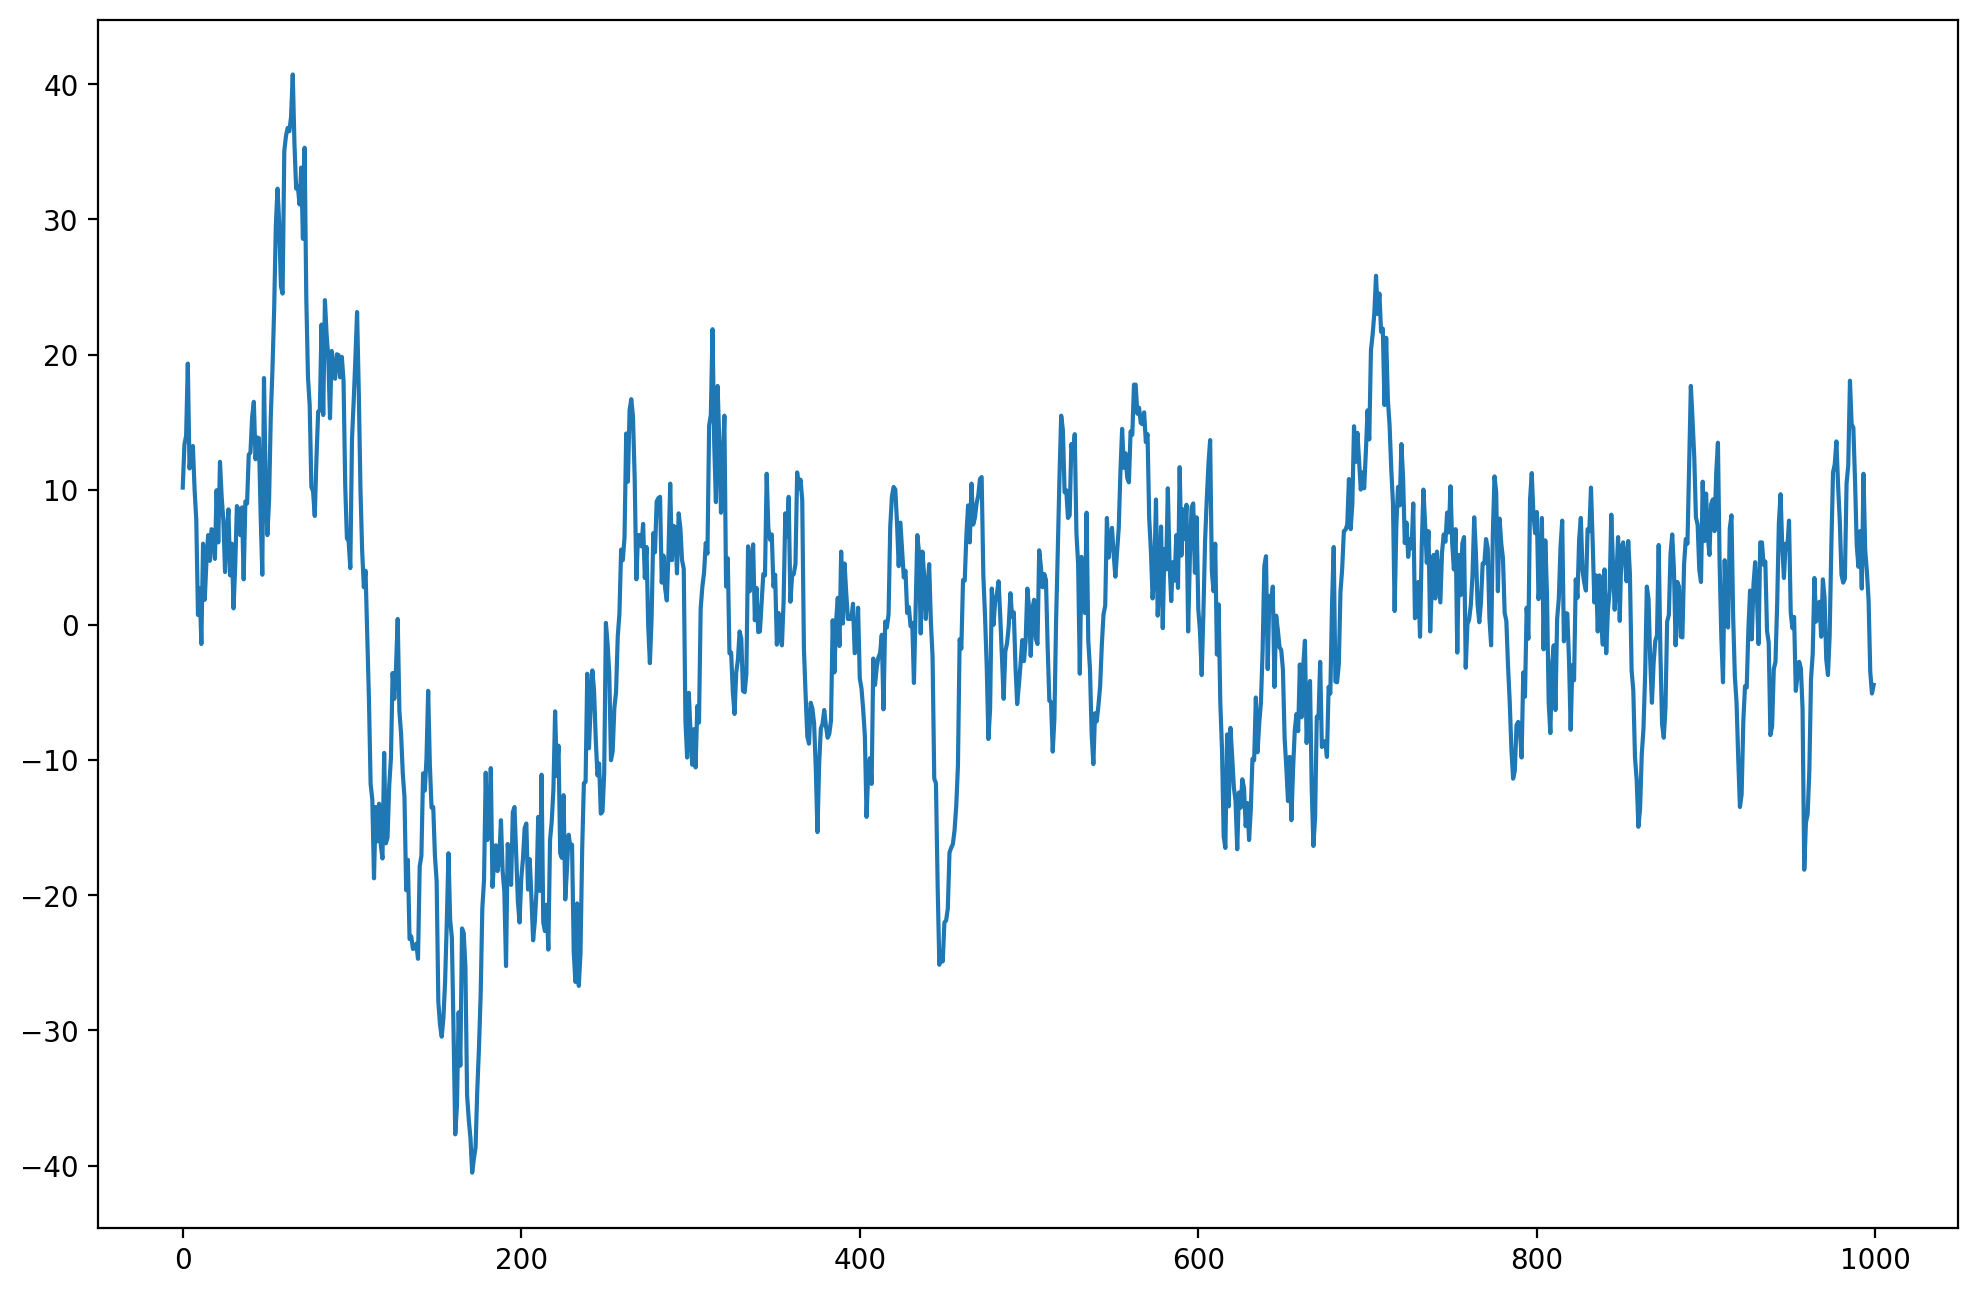

In [10]:
plot = plt.plot(X_train_valid[1,1])

In [4]:
X_test_dir = './data/X_test.npy'
y_test_dir = './data/y_test.npy' 
X_train_valid_dir = './data/X_train_valid.npy' 
y_train_valid_dir = './data/y_train_valid.npy'

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.389793
0	1.395896	0.237702	1.385489	0.250591	
--Iter 49	1.363170
1	1.381709	0.274259	1.387591	0.260047	
--Iter 49	1.367818
2	1.371089	0.310226	1.374044	0.328605	
--Iter 49	1.353827
3	1.368652	0.310815	1.369442	0.328605	
--Iter 49	1.292333
4	1.357810	0.348467	1.361262	0.364066	
--Iter 49	1.395783
5	1.351035	0.359838	1.355614	0.342790	
--Iter 49	1.343755
6	1.342697	0.405745	1.353267	0.368794	
--Iter 49	1.351562
7	1.335124	0.404565	1.355689	0.321513	
--Iter 49	1.303325
8	1.329707	0.423181	1.343880	0.352246	
--Iter 49	1.255298
9	1.322199	0.422675	1.342851	0.354610	
--Iter 49	1.276327
10	1.310732	0.474983	1.341556	0.361702	
--Iter 49	1.274803
11	1.303769	0.473972	1.335215	0.373522	
--Iter 49	1.317437
12	1.292990	0.485175	1.334941	0.366430	
--Iter 49	1.268298
13	1.284490	0.500505	1.312440	0.458629	
--Iter 49	1.232163
14	1.273681	0.526112	1.304103	0.494090	
--Iter 49	1.255030
15	1.261518	0.545569	1.295454	0.449173	
-

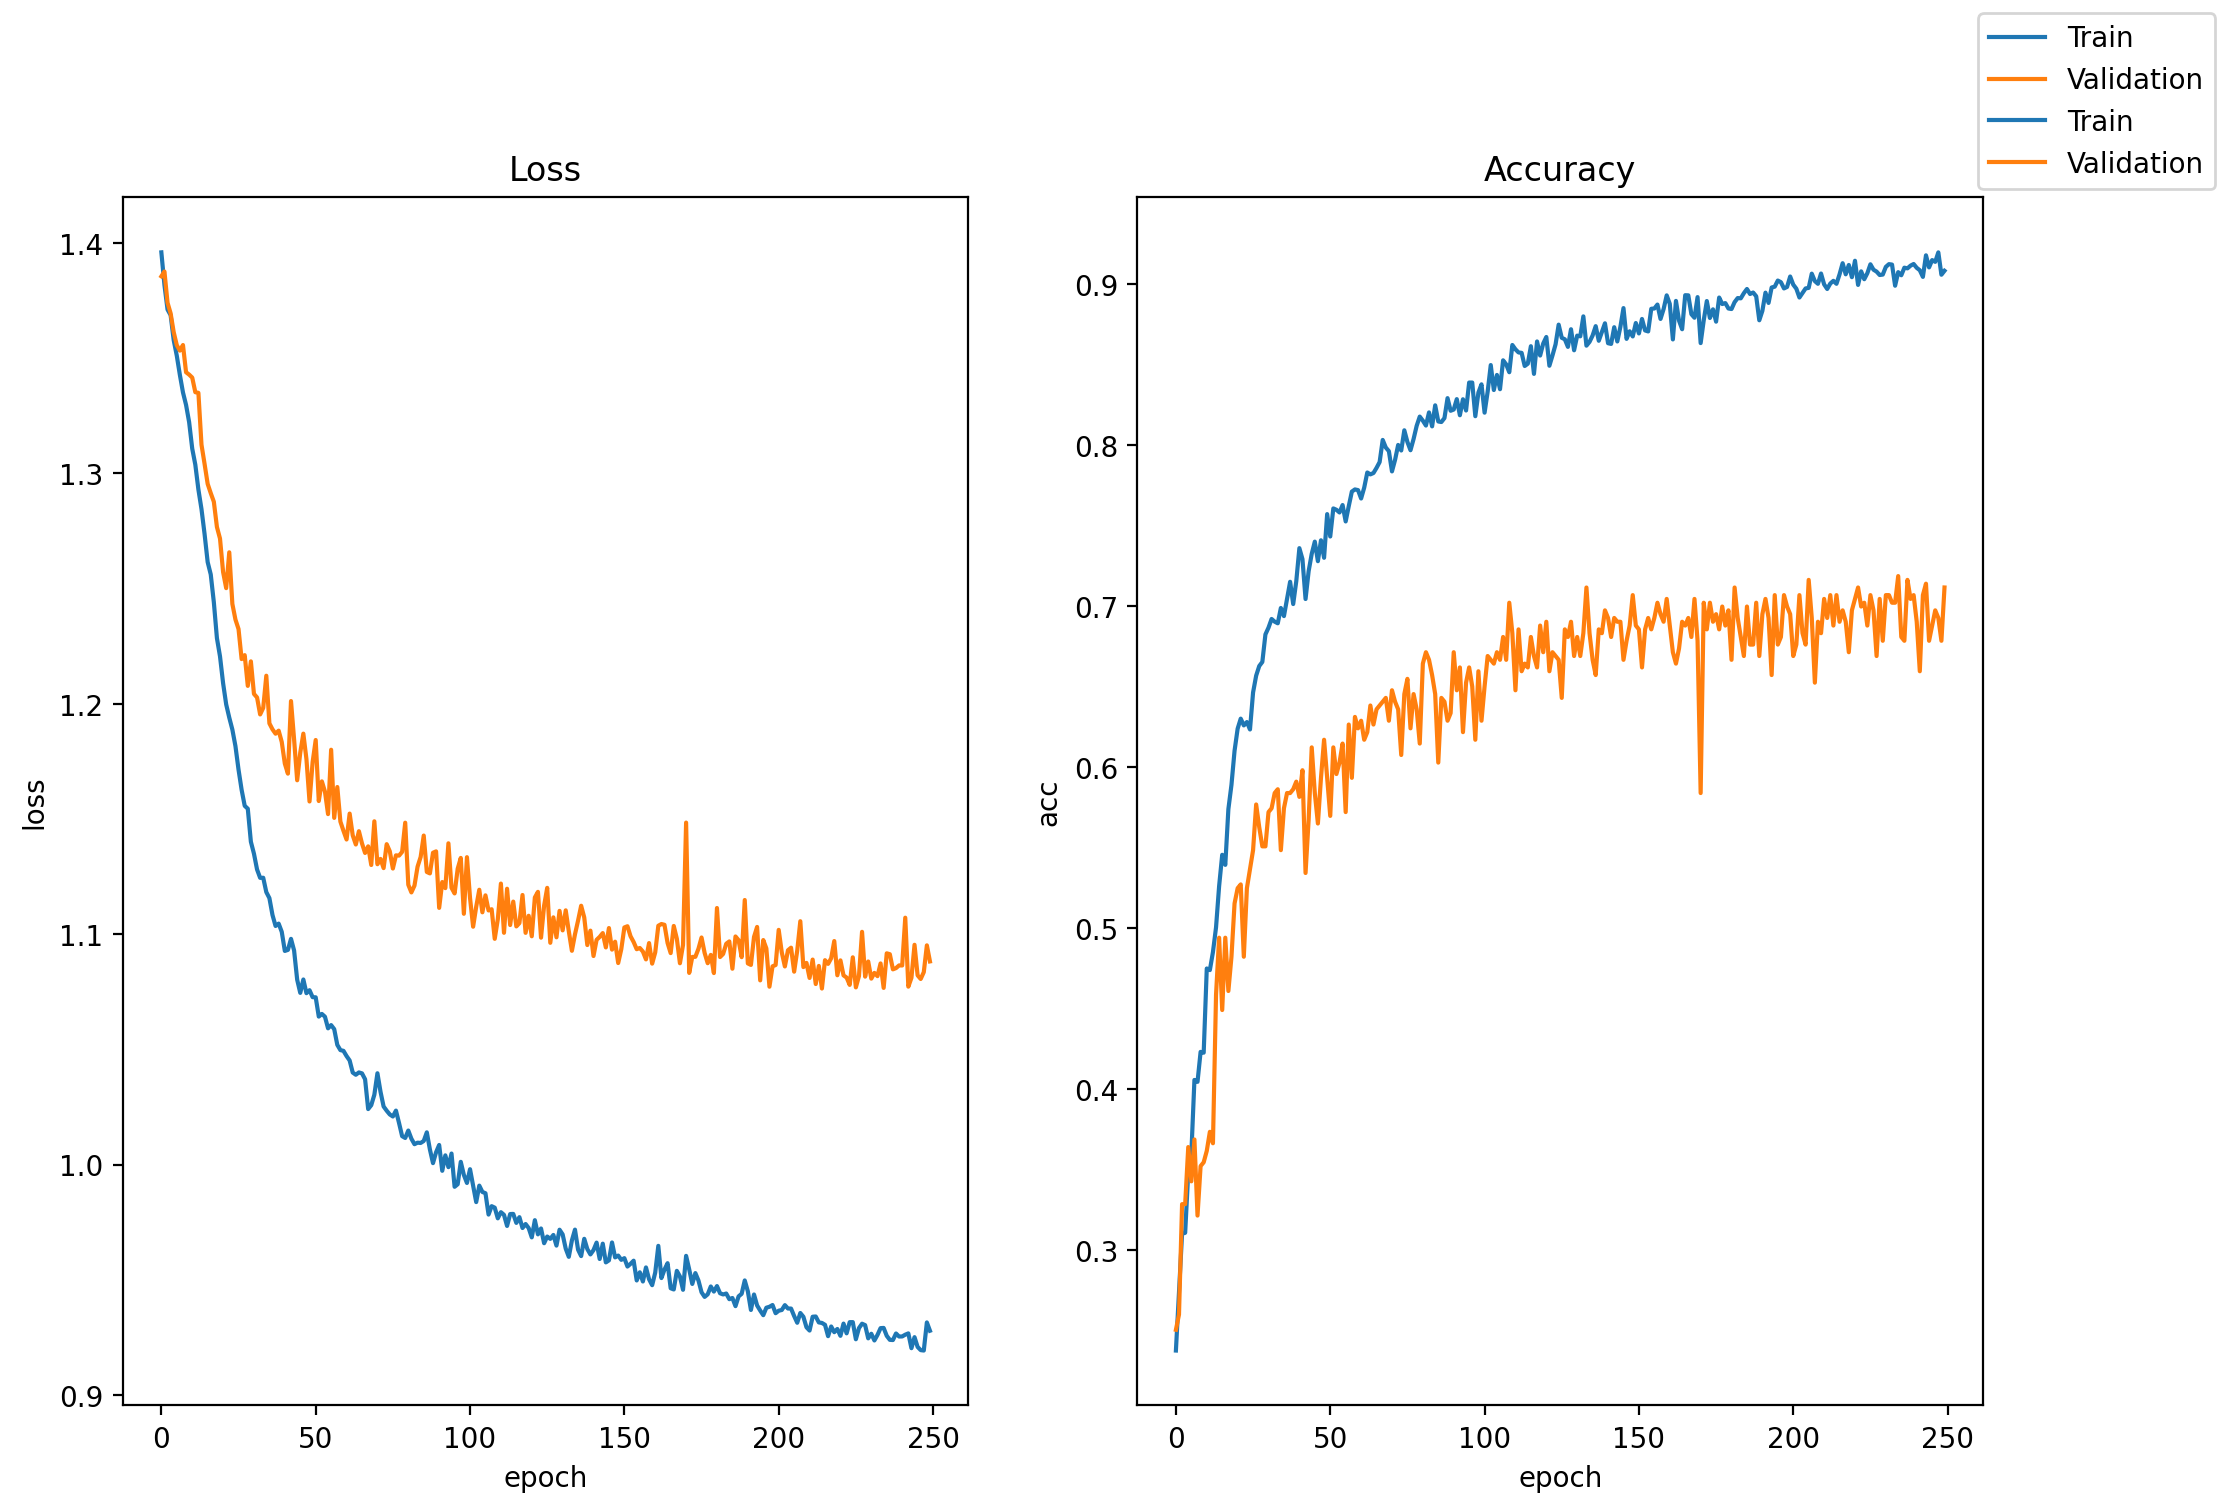

In [7]:
model = ShallowConv(1,4).to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 100,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 5e-5,
}
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)


716	0.645390	
--Iter 49	1.114982
170	1.104296	0.705020	1.138970	0.657210	
--Iter 49	1.106777
171	1.096964	0.714286	1.130185	0.676123	
--Iter 49	1.129139
172	1.099527	0.714623	1.124581	0.666667	
--Iter 49	1.156350
173	1.102719	0.701651	1.136948	0.657210	
--Iter 49	1.122247
174	1.106526	0.707126	1.131098	0.661939	
--Iter 49	1.171318
175	1.098007	0.714875	1.128424	0.664303	
--Iter 49	1.077881
176	1.105250	0.708053	1.136732	0.654846	
--Iter 49	1.208259
177	1.107404	0.697355	1.134119	0.654846	
--Iter 49	1.151308
178	1.094393	0.720856	1.144945	0.614657	
--Iter 49	1.136782
179	1.107864	0.695334	1.138118	0.671395	
--Iter 49	1.120394
180	1.103483	0.705104	1.139630	0.643026	
--Iter 49	1.075083
181	1.103410	0.708221	1.132799	0.666667	
--Iter 49	1.093248
182	1.097670	0.715886	1.138370	0.647754	
--Iter 49	1.181833
183	1.100040	0.707294	1.136675	0.650118	
--Iter 49	1.104658
184	1.100165	0.700472	1.128862	0.666667	
--Iter 49	1.087080
185	1.096643	0.710832	1.132822	0.657210	
--Iter 49	1.075950
186	1.0

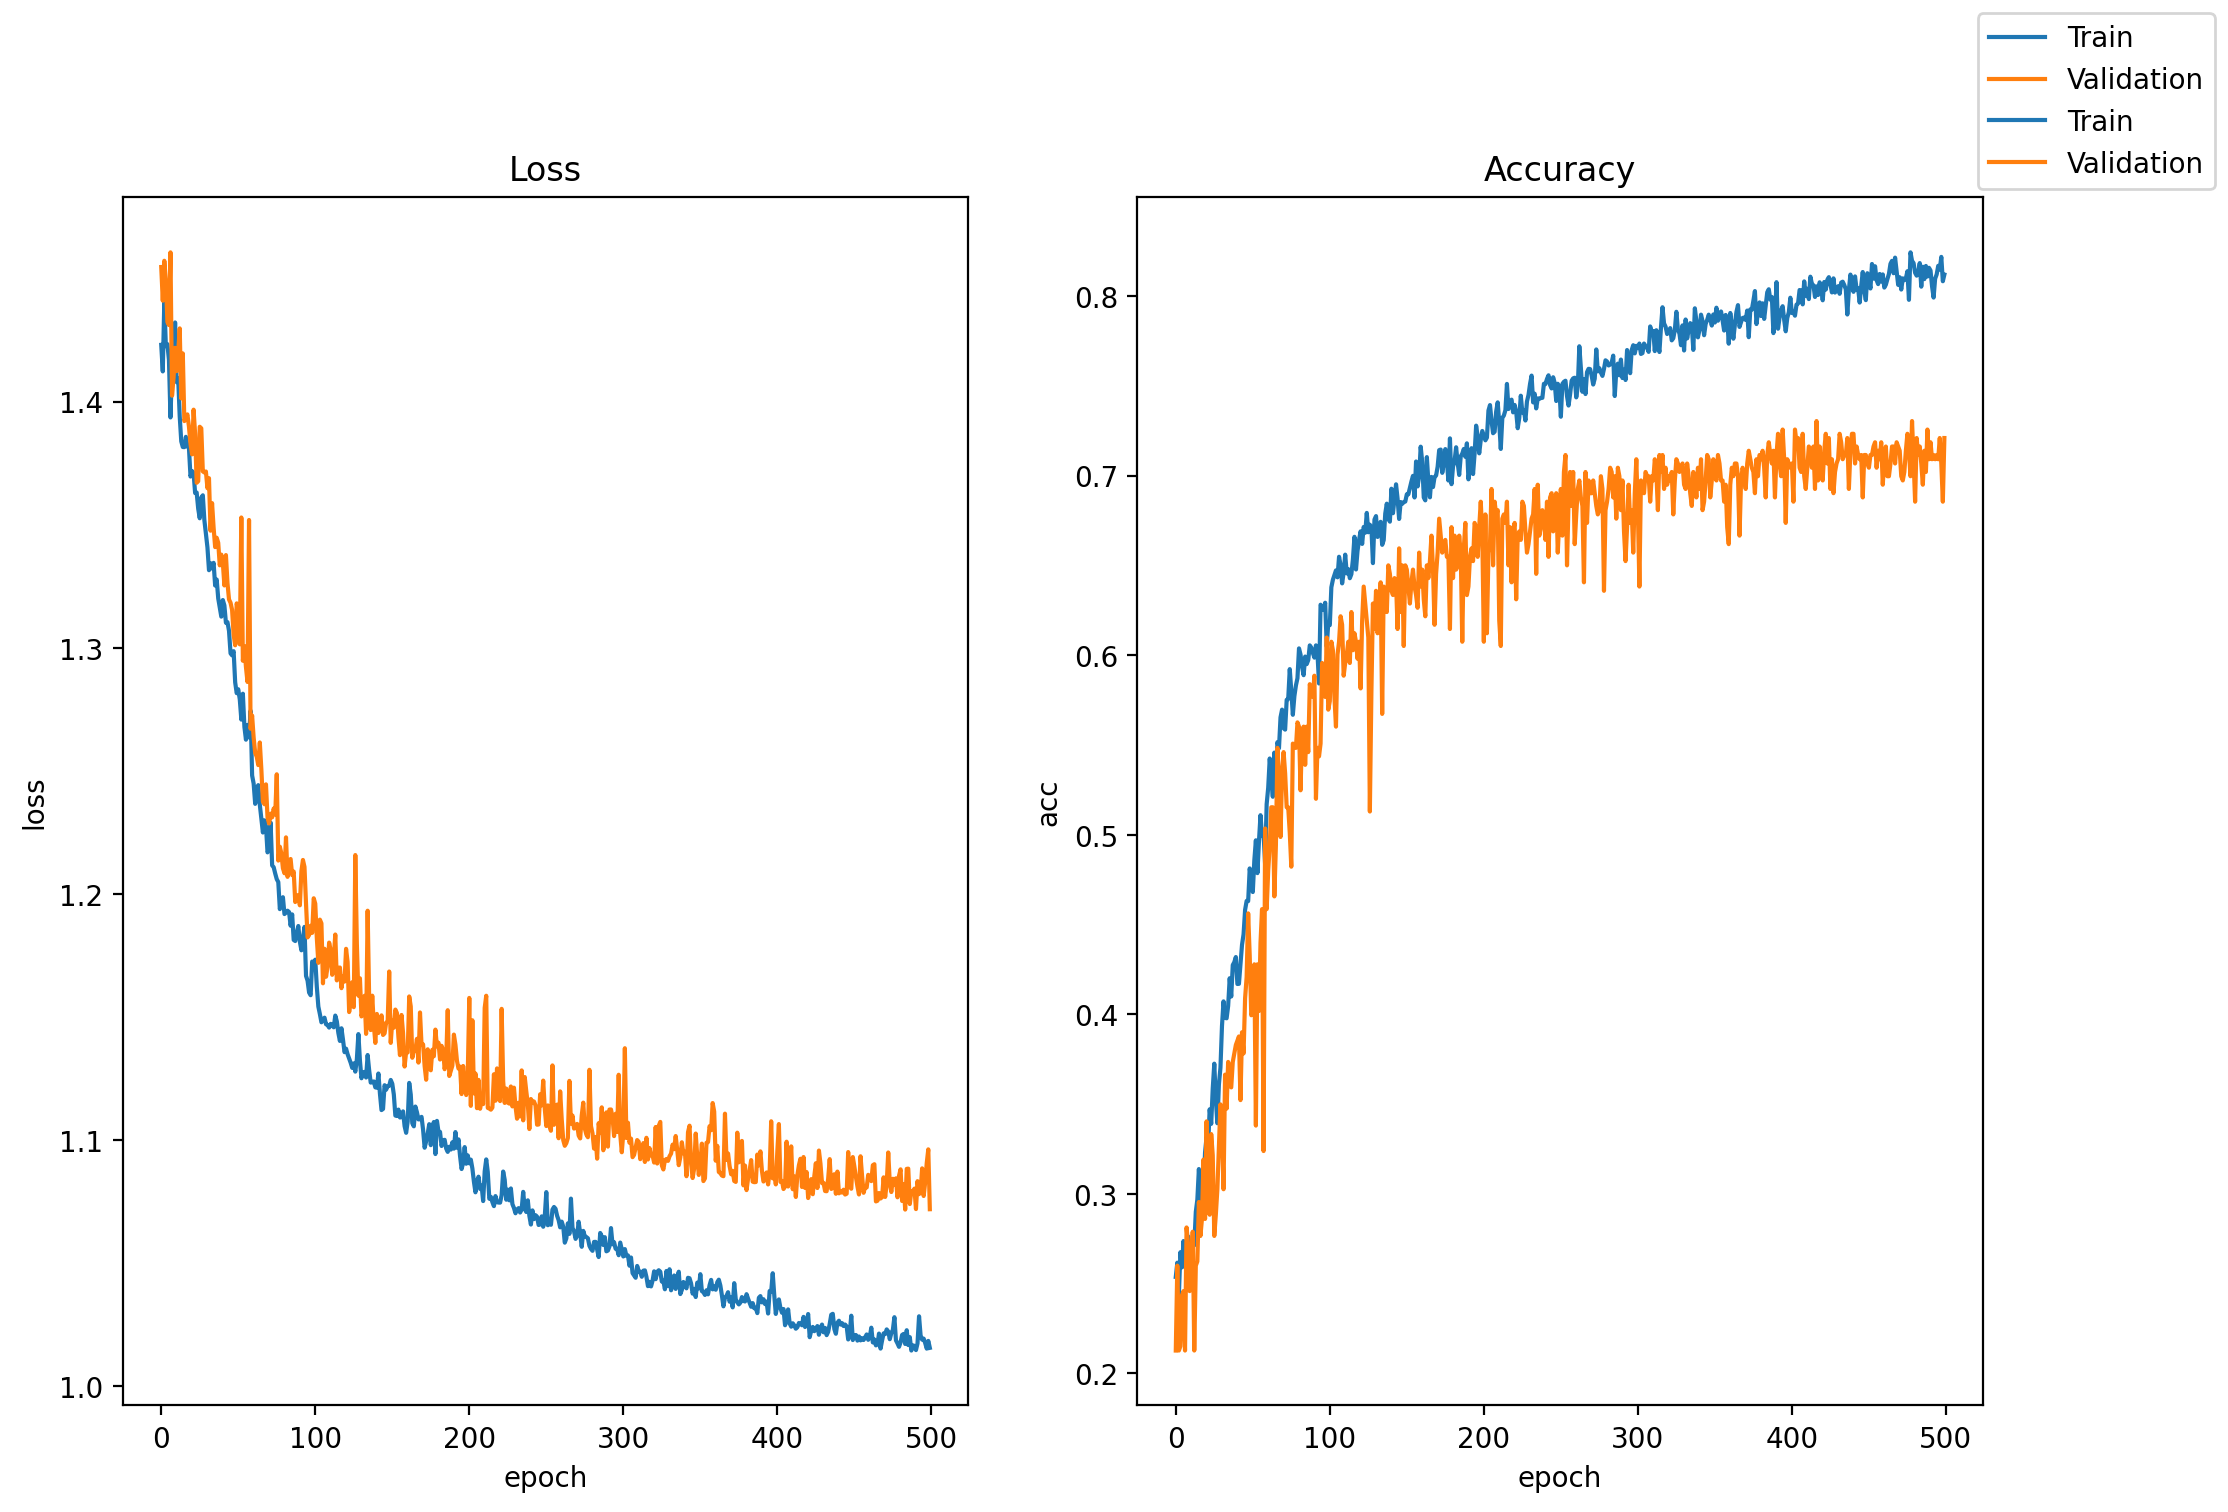

In [18]:
model = ShallowConv(1,4).to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 100,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'transform': 'shift_positive',
    'epoch_num': 500
}
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)
print("Max Validation Acc: {}".format(np.max(logs['val_acc'])))

288	0.572104	
--Iter 49	1.145652
370	1.143522	0.674276	1.190228	0.588652	
--Iter 49	1.150860
371	1.144148	0.673181	1.189996	0.600473	
--Iter 49	1.167947
372	1.142682	0.677476	1.192147	0.593381	
--Iter 49	1.084040
373	1.143377	0.675708	1.191629	0.586288	
--Iter 49	1.198388
374	1.143255	0.667958	1.191508	0.593381	
--Iter 49	1.078414
375	1.143955	0.678235	1.189861	0.583924	
--Iter 49	1.149961
376	1.143454	0.672591	1.194463	0.591017	
--Iter 49	1.125577
377	1.143589	0.676550	1.191990	0.593381	
--Iter 49	1.230534
378	1.142204	0.678740	1.190663	0.605201	
--Iter 49	1.097709
379	1.140974	0.677392	1.191763	0.591017	
--Iter 49	1.127075
380	1.142116	0.679835	1.188431	0.583924	
--Iter 49	1.227530
381	1.140328	0.687500	1.187567	0.574468	
--Iter 49	1.177684
382	1.140135	0.679919	1.193219	0.593381	
--Iter 49	1.120087
383	1.140306	0.678993	1.188305	0.600473	
--Iter 49	1.093122
384	1.140885	0.678993	1.197039	0.581560	
--Iter 49	1.169495
385	1.143293	0.674444	1.189555	0.583924	
--Iter 49	1.200001
386	1.1

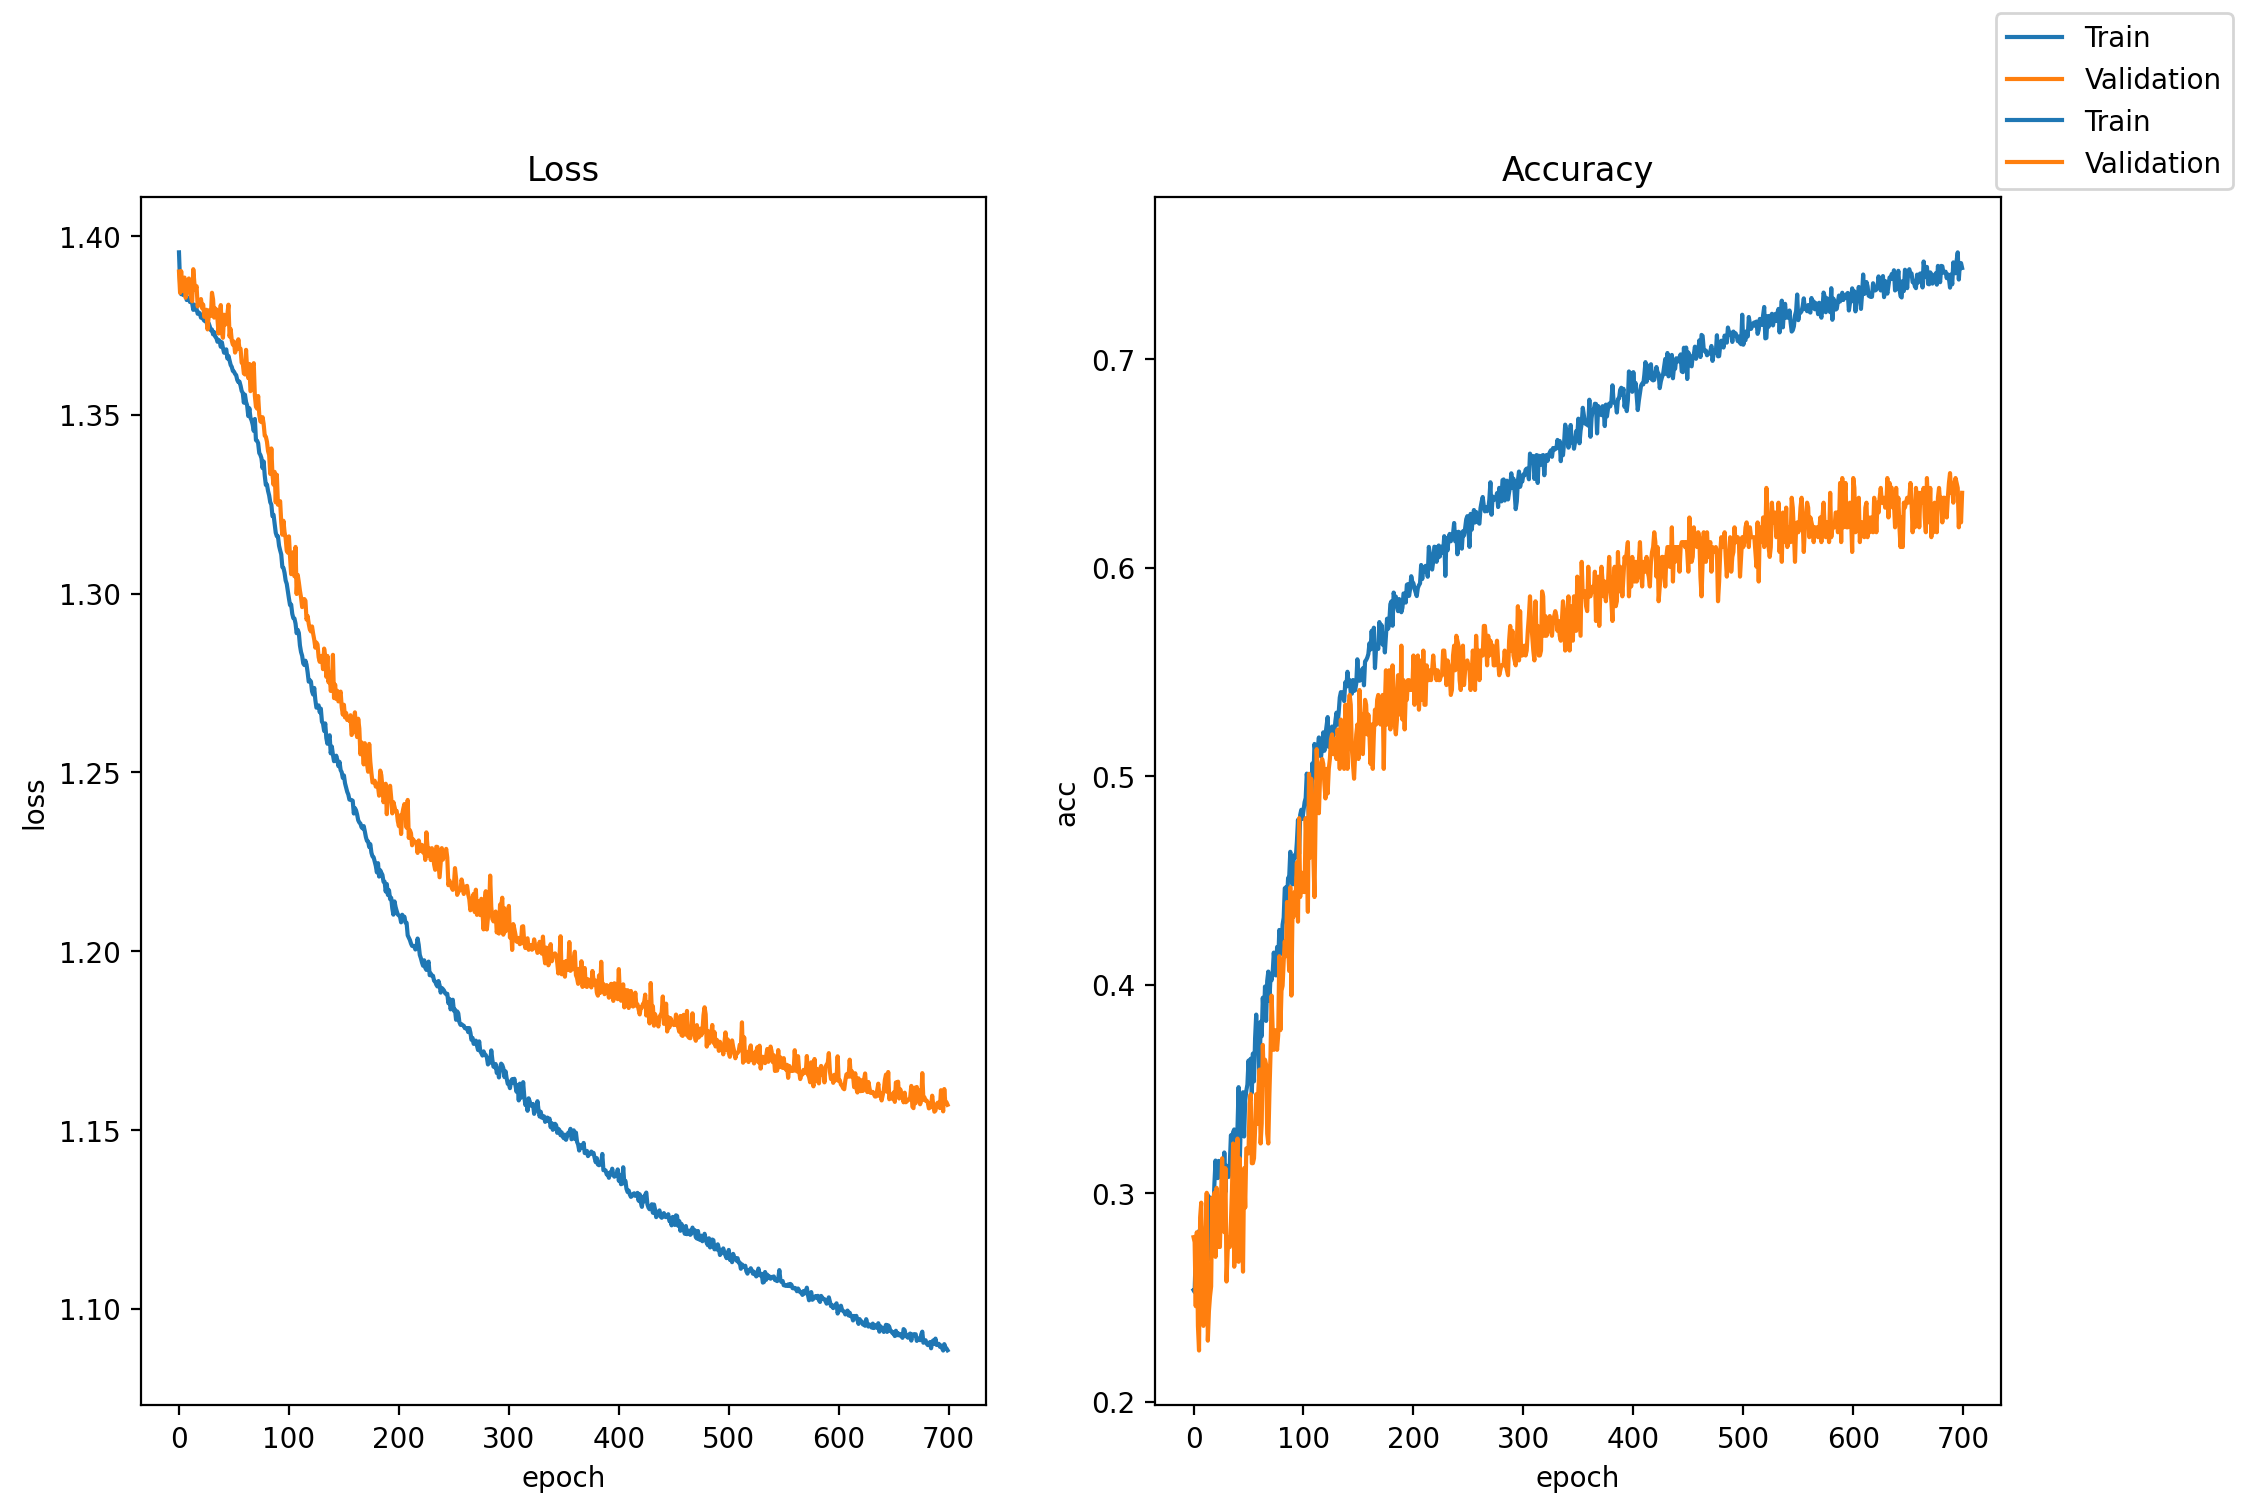

Max Validation Acc: 0.6453900709219859


In [5]:
model = ShallowConv(1,4,activation='selu').to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 100,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'transform': 'shift_positive',
    'epoch_num': 700,
    'learning_rate': 1e-5
}
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)
print("Max Validation Acc: {}".format(np.max(logs['val_acc'])))

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.556116
0	1.462867	0.260950	1.521375	0.222222	
--Iter 49	1.524772
1	1.486271	0.257328	1.521209	0.222222	
--Iter 49	1.416974
2	1.476118	0.253959	1.452335	0.219858	
--Iter 49	1.399915
3	1.458382	0.267604	1.516717	0.226950	
--Iter 49	1.556166
4	1.479769	0.263898	1.516717	0.226950	
--Iter 49	1.556161
5	1.479768	0.263898	1.516713	0.226950	
--Iter 49	1.524903
6	1.479510	0.264151	1.516697	0.226950	
--Iter 49	1.556068
7	1.479808	0.263814	1.516541	0.226950	
--Iter 49	1.524917
8	1.470550	0.261203	1.516718	0.226950	
--Iter 49	1.618668
9	1.479264	0.264404	1.516718	0.226950	
--Iter 49	1.556168
10	1.479433	0.264235	1.516718	0.226950	
--Iter 49	1.431167
11	1.479432	0.264235	1.516717	0.226950	
--Iter 49	1.556169
12	1.479599	0.264067	1.516713	0.226950	
--Iter 49	1.306133
13	1.479413	0.264235	1.516672	0.226950	
--Iter 49	1.428008
14	1.465973	0.260697	1.512714	0.222222	
--Iter 49	1.462171
15	1.442622	0.272995	1.516583	0.226950	
-

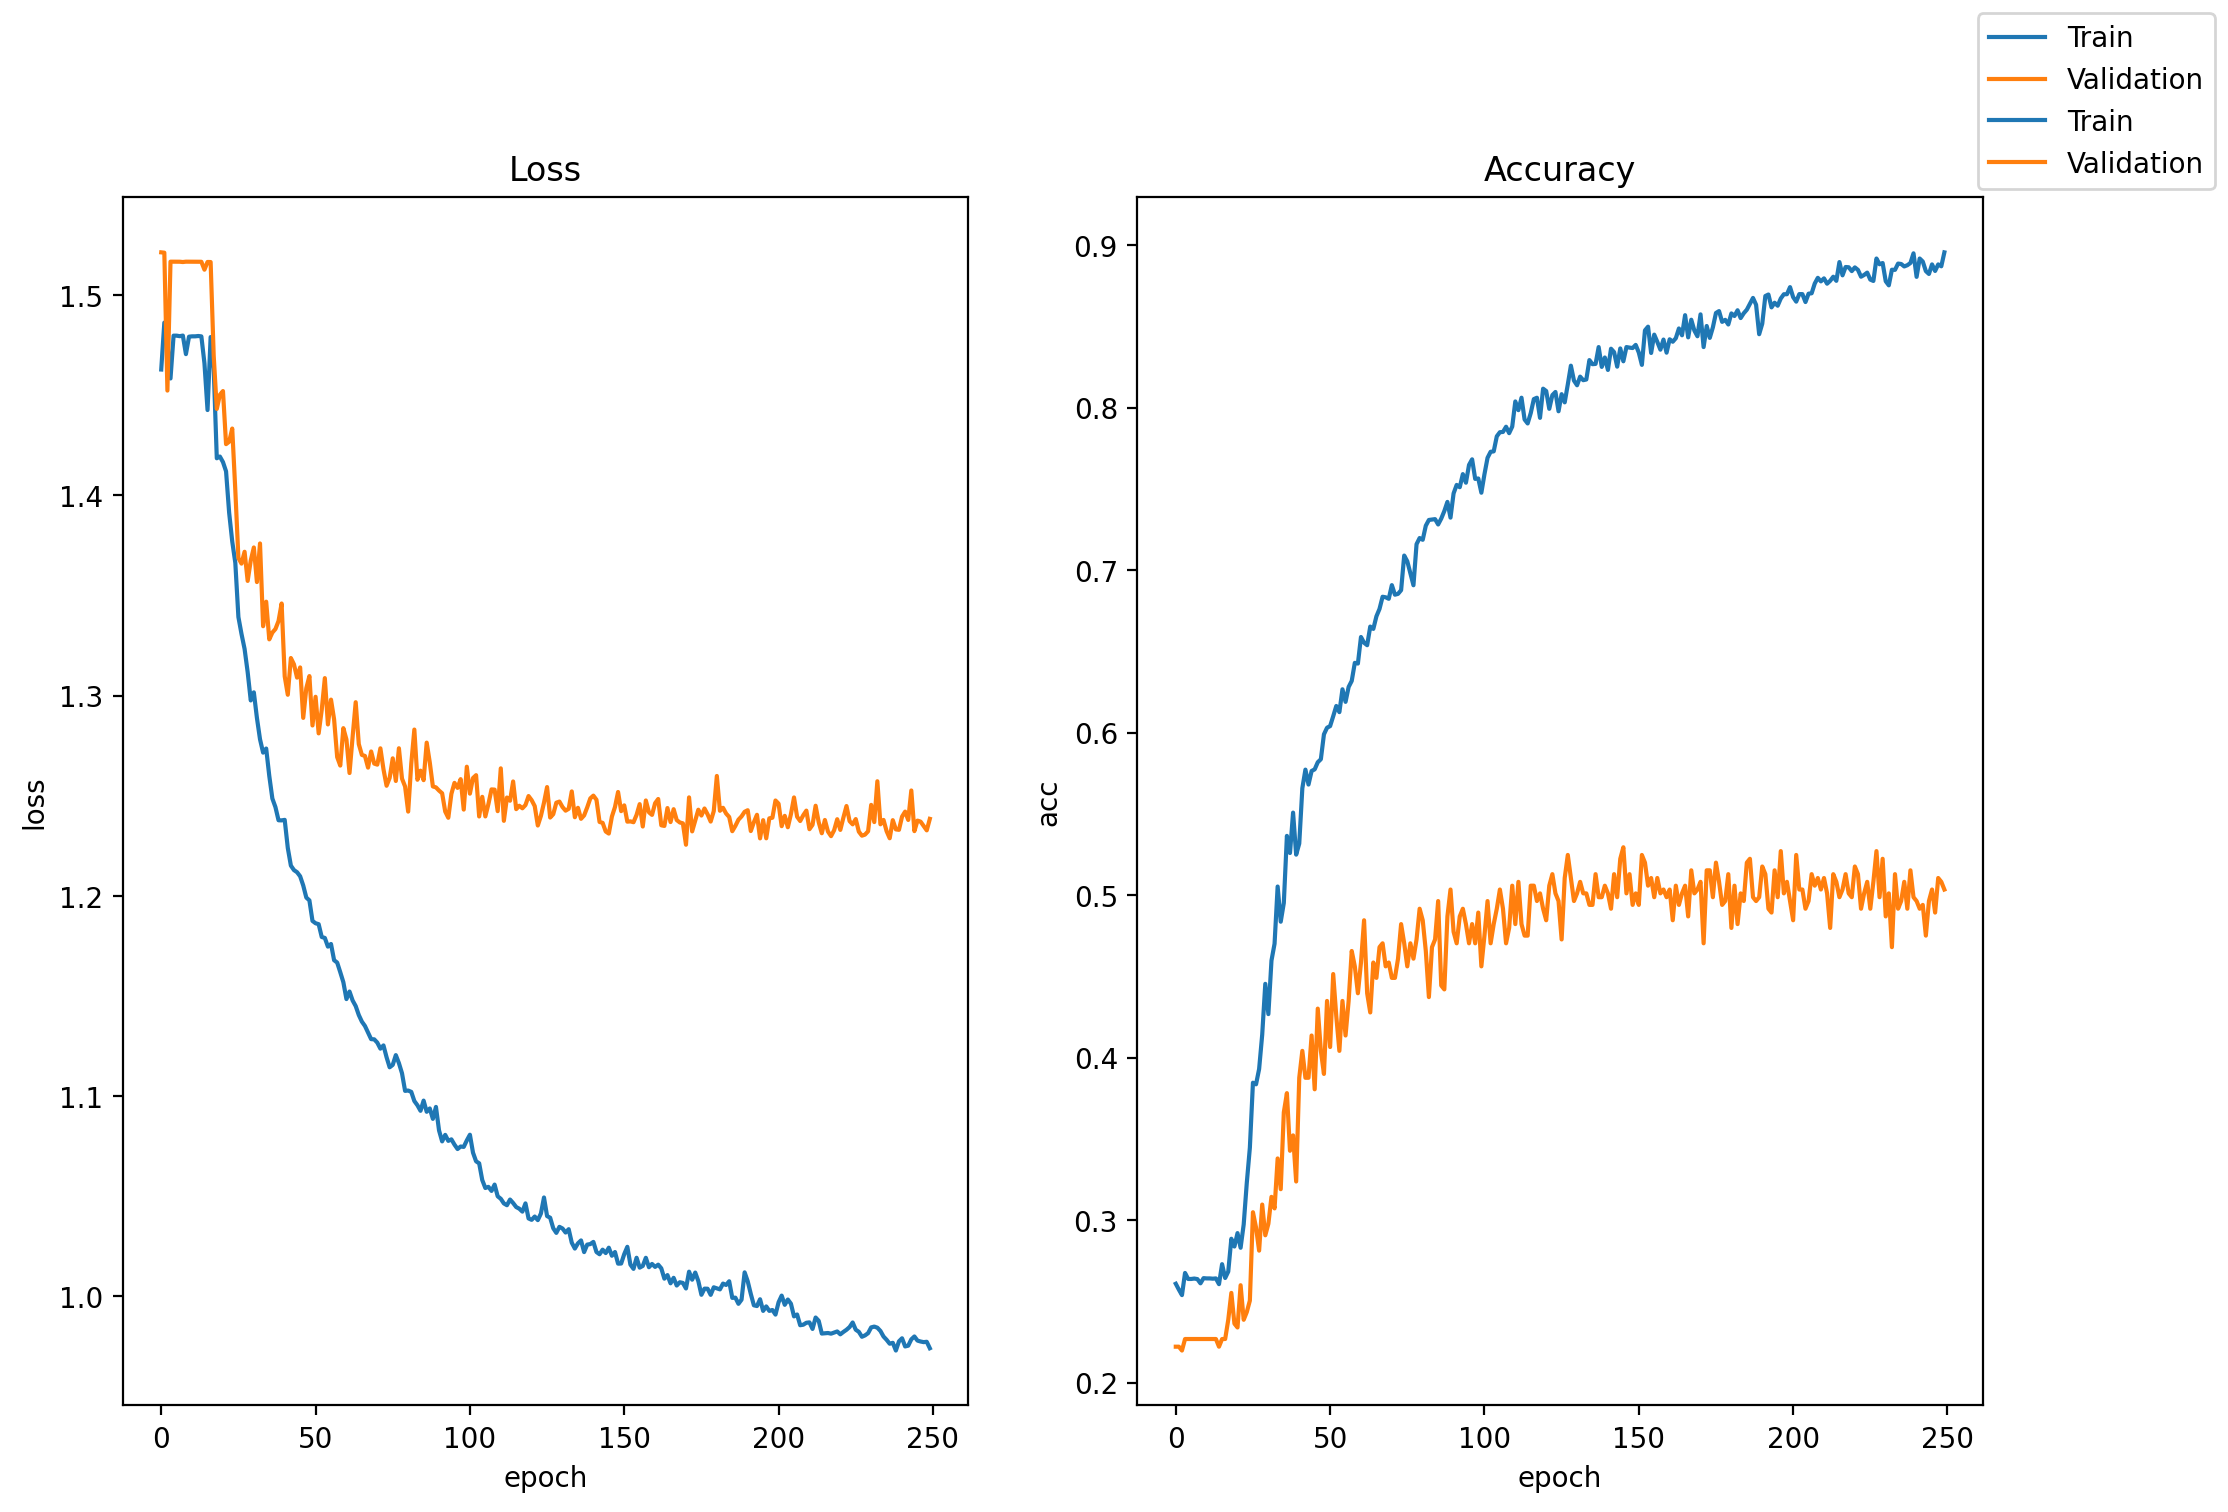

In [11]:
model = ShallowConv(1,4).to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 100,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'transform': 'square'
}
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)

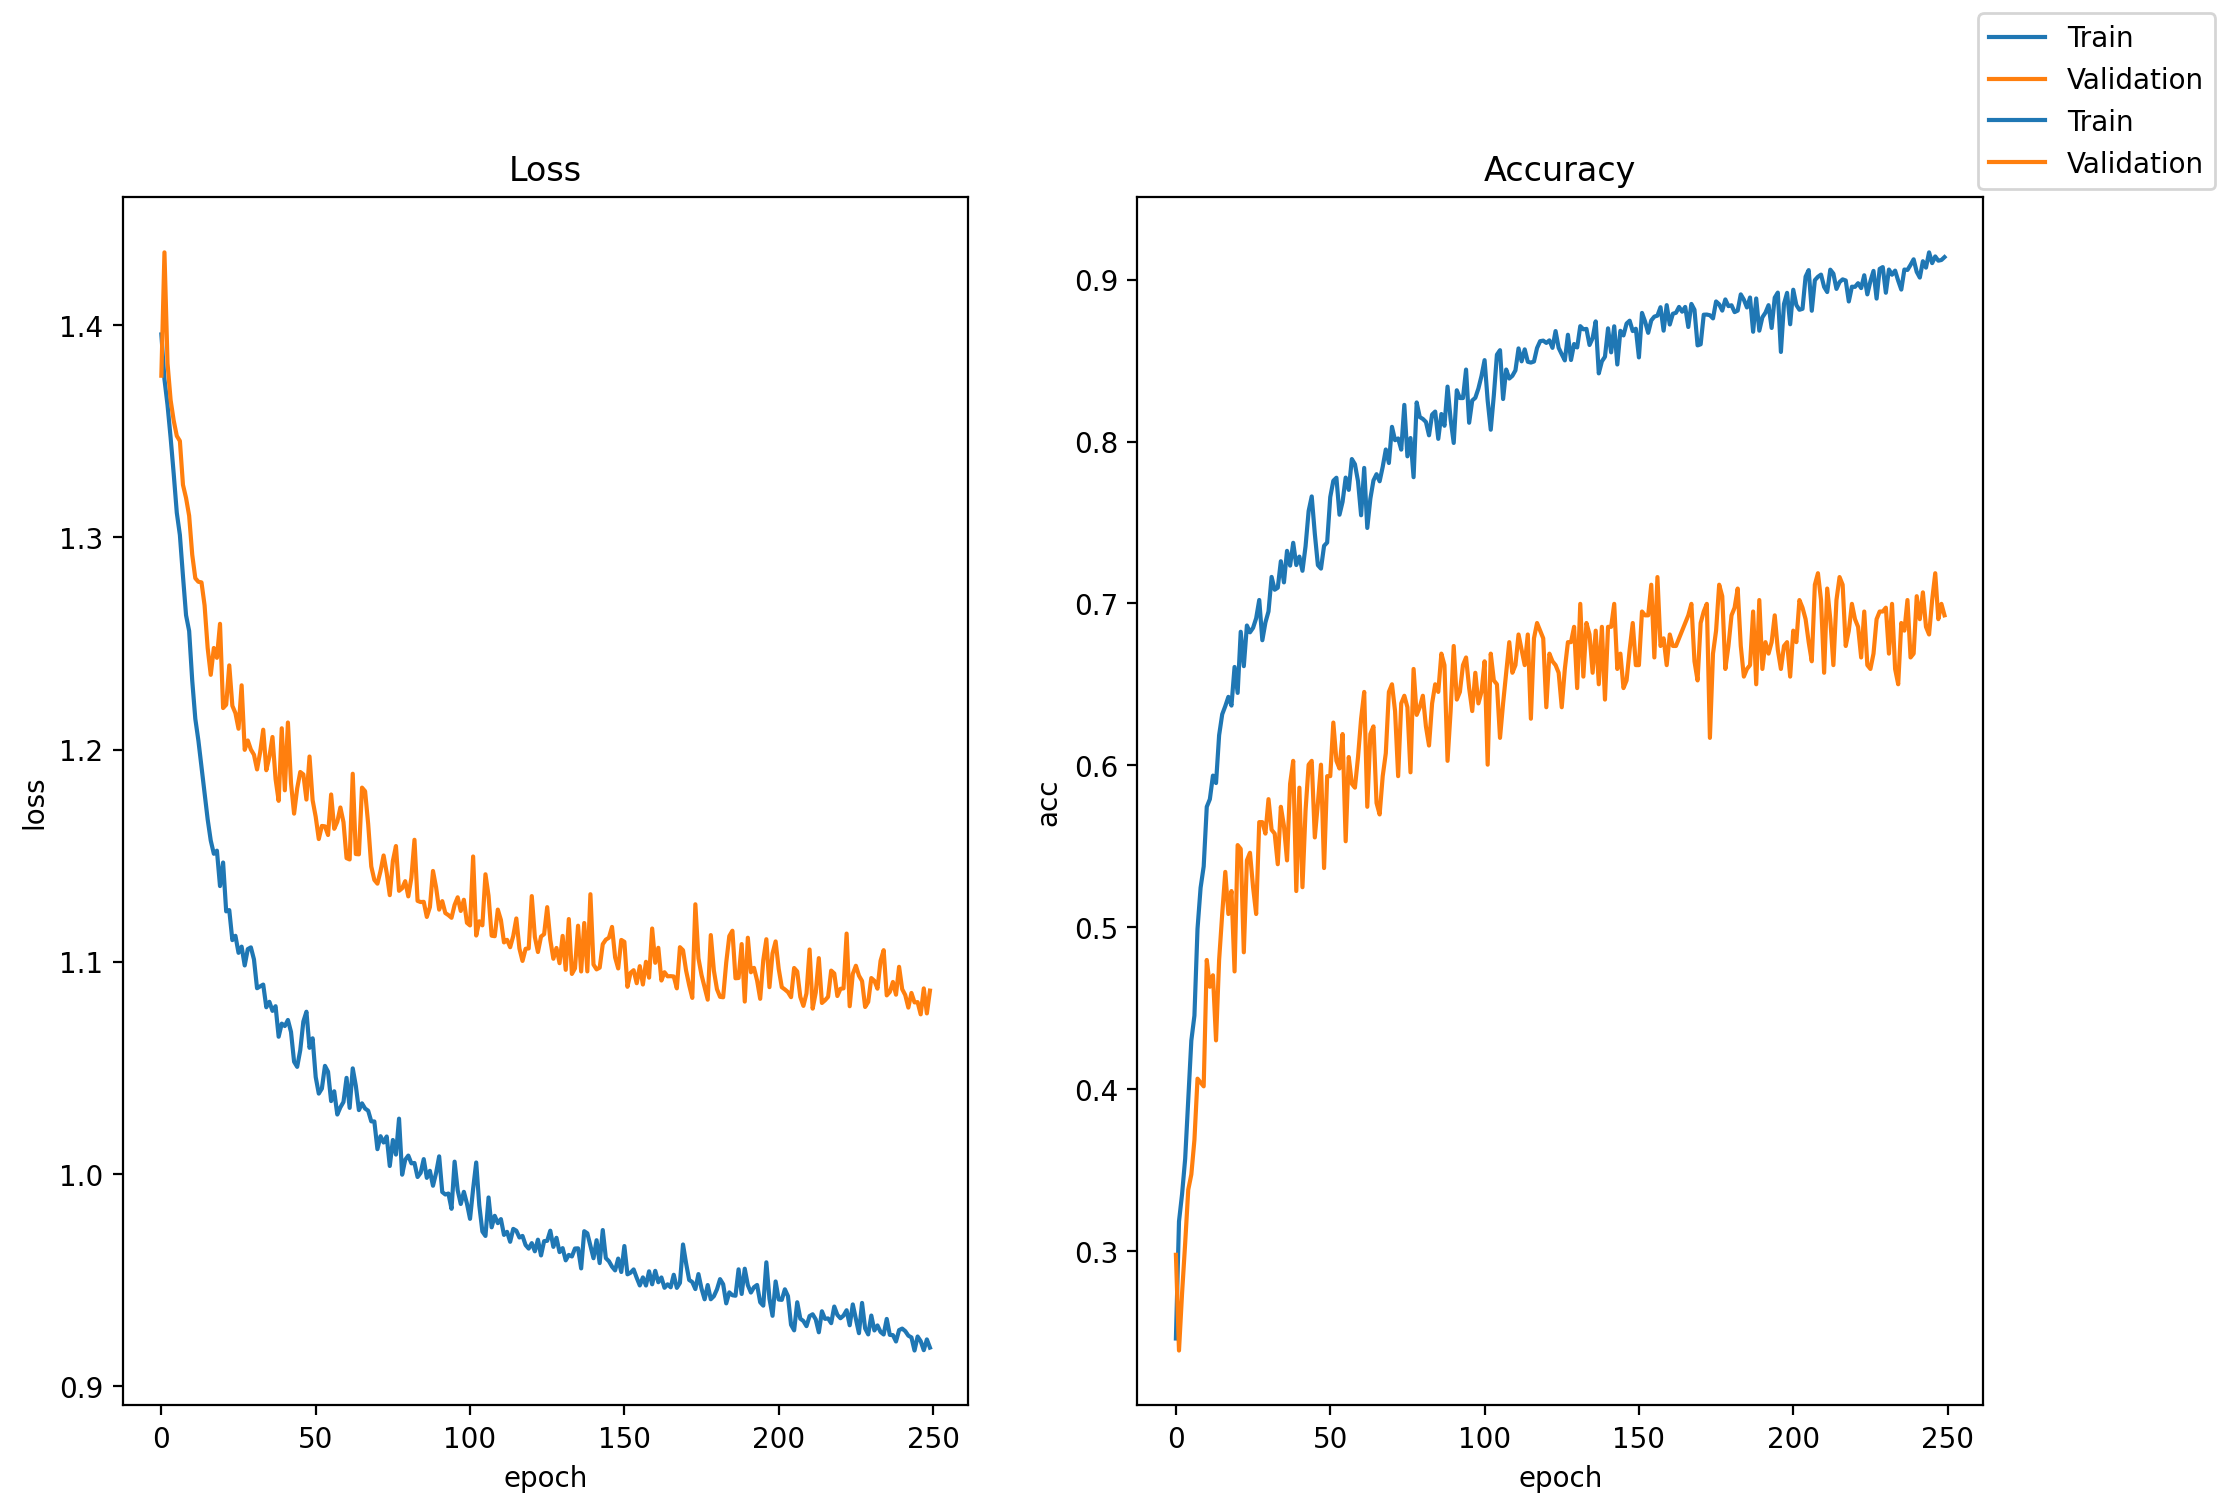

In [26]:
import matplotlib.pyplot as plt 
fig,(ax1,ax2) = plt.subplots(1,2) 
ax1.plot(logs['train_loss'],label='Train')
ax1.plot(logs['val_loss'],label = 'Validation')
ax1.set_title('Loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax2.plot(logs['train_acc'],label = 'Train')
ax2.plot(logs['val_acc'],label = 'Validation')
ax2.set_title('Accuracy')
ax2.set_xlabel('epoch')
ax2.set_ylabel('acc')
fig.legend() 
plt.show() 